In [1]:
import pandas as pd
liver = pd.read_csv('../Data/liver.csv')
liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
liver['gender'] = le.fit_transform(liver['gender'])
liver.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
liver.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [4]:
liver['alkphos'] = liver['alkphos'].fillna(liver['alkphos'].mean())

In [5]:
patient = liver['is_patient']
data = liver.drop('is_patient',1)

data.head(2)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74


In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [7]:
X_train,X_test,y_train,y_test = train_test_split(data,patient,test_size=0.1,random_state=1)
X_train.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
273,30,1,0.7,0.2,262,15,18,9.6,4.7,1.2
535,60,1,19.6,9.5,466,46,52,6.1,2.0,0.4
159,50,1,1.2,0.4,282,36,32,7.2,3.9,1.1
120,32,1,23.0,11.3,300,482,275,7.1,3.5,0.9
29,84,0,0.7,0.2,188,13,21,6.0,3.2,1.1


In [8]:
y_train.head()

273    1
535    1
159    1
120    1
29     2
Name: is_patient, dtype: int64

In [21]:
ss = StandardScaler()

train = ss.fit_transform(X_train)
test = ss.fit_transform(X_test)

X_train = pd.DataFrame(data=train,index=X_train.index,columns=X_train.columns)
X_test = pd.DataFrame(data=test,index=X_test.index,columns=X_test.columns)

In [22]:
knn = KNeighborsClassifier(n_neighbors=2)

In [23]:
cv = cross_val_score(knn,X_train,y_train,cv=5)
cv

array([0.72380952, 0.6952381 , 0.72380952, 0.72380952, 0.68269231])

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [25]:
knn.score(X_test,y_test)

0.7966101694915254

In [26]:
pred = knn.predict(X_test)

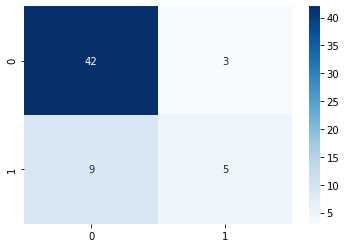

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g',cmap='Blues')
plt.show()